In [2]:
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
# Create a pipeline that will scale the numerical data and then feed the resulting data into a decision tree

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
%matplotlib inline
import umap
from imblearn.datasets import make_imbalance
import pickle
import numba

C:\Users\alinu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\alinu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\alinu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\alinu\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [4]:
with open('../../data/pickle/train.pk', 'rb') as f:
    X,y = pickle.load(f)
with open('../../data/pickle/test.pk', 'rb') as f:
    X_test,y_test = pickle.load(f)

In [5]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
X_test_scaled=scaler.transform(X_test)

In [7]:
with open('../../data/pickle/test_scaled.sav', 'wb') as f:
    pickle.dump([X_test_scaled,y_test], f)

In [8]:
np.unique(y, return_counts=True)

(array(['flooding', 'impersonation', 'injection', 'normal'], dtype=object),
 array([  48484,   48522,   65379, 1633190], dtype=int64))

In [9]:
data = np.array(np.vstack([X_scaled, X_test_scaled]), dtype=np.float64)
target = np.hstack([y, y_test])
np.unique(target, return_counts=True)
X_rs, y_rs = make_imbalance(data, target, sampling_strategy={'normal':205285, 'injection':82061, 'impersonation':68601, 'flooding':54623},random_state=0)                       

In [10]:
data=X_rs
target=y_rs
encoder = LabelEncoder()
encoded_target = encoder.fit_transform(target)
encoded_target

array([0, 0, 0, ..., 3, 3, 3])

In [11]:
np.unique(y_rs, return_counts=True)

(array(['flooding', 'impersonation', 'injection', 'normal'], dtype=object),
 array([ 54623,  68601,  82061, 205285], dtype=int64))

In [12]:
#with open('/global/cscratch1/sd/alazar/fedLearn/pfile/all_data.sav', 'wb') as f:
with open('../../data/pickle/all_data.sav', 'wb') as f:
    pickle.dump([X_rs,encoded_target], f)

In [13]:
X_rs, y_rs = make_imbalance(X_scaled, y, sampling_strategy={'normal':162385, 'injection':65379, 'impersonation':48522, 'flooding':48484},random_state=0)                       

In [14]:
data=X_rs
target=y_rs
encoder = LabelEncoder()
encoded_target = encoder.fit_transform(target)
encoded_target

array([0, 0, 0, ..., 3, 3, 3])

In [15]:
with open('../../data/pickle/train_rs.sav', 'wb') as f:
    pickle.dump([X_rs,y_rs], f)

In [16]:
# do a basic naive bayes fitting
nb = GaussianNB()

# fit our model to the data
nb.fit(X_rs, y_rs)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
# simple function to test the accuracy of a model fitted on training data on our testing data
def get_test_accuracy_of(model):
    y_preds = model.predict(X_test_scaled)
    return accuracy_score(y_preds, y_test)
    
# naive abyes does very poorly on its own!
get_test_accuracy_of(nb)

0.937751349360628

In [18]:
model=nb
y_preds = model.predict(X_test_scaled)
confusion_matrix(y_preds, y_test)

array([[  5963,   1419,      0,  10745],
       [     0,      0,      0,      0],
       [     0,  13324,  13807,      0],
       [  2134,   5336,   2875, 520040]], dtype=int64)

Confusion matrix, without normalization
[[  5963      0      0   2134]
 [  1419      0  13324   5336]
 [     0      0  13807   2875]
 [ 10745      0      0 520040]]
Normalized confusion matrix
[[0.7364456  0.         0.         0.2635544 ]
 [0.07067085 0.         0.66357886 0.26575029]
 [0.         0.         0.82765855 0.17234145]
 [0.0202436  0.         0.         0.9797564 ]]


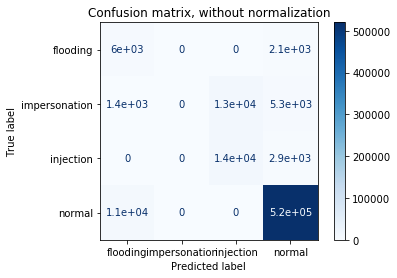

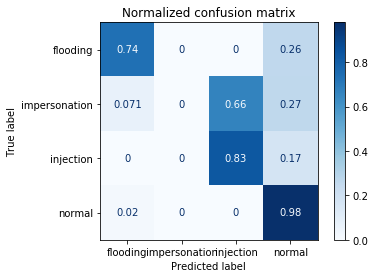

In [22]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names=['flooding', 'impersonation', 'injection', 'normal']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(nb, X_test_scaled, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [21]:
lr = LogisticRegression()

lr.fit(X_rs, y_rs)

# Logistic Regressions does even worse
get_test_accuracy_of(lr)

C:\Users\alinu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9484767468726276

In [23]:
model=lr
y_preds = model.predict(X_test_scaled)
confusion_matrix(y_preds, y_test)

array([[  5971,  13914,   1140,   2209],
       [     0,    578,      0,   4670],
       [     0,    929,  15540,     11],
       [  2126,   4658,      2, 523895]], dtype=int64)

In [24]:
tree = DecisionTreeClassifier()

tree.fit(X_rs, y_rs)

# Tree does very well!
get_test_accuracy_of(tree)

0.9587348408649111

In [25]:
model=tree
y_preds = model.predict(X_test_scaled)
confusion_matrix(y_preds, y_test)

array([[  3071,      0,      0,      0],
       [     0,   1472,      0,    119],
       [     0,      0,  16680,      0],
       [  5026,  18607,      2, 530666]], dtype=int64)

In [46]:
forest = RandomForestClassifier(max_depth=15, random_state=0)

In [47]:
%%time
forest.fit(X_rs, y_rs)

Wall time: 52.4 s


In [58]:
# Random Forest does slightly worse
get_test_accuracy_of(forest)

0.9582866464110569

In [48]:
model=forest
y_preds = model.predict(X_test_scaled)
confusion_matrix(y_preds, y_test)

array([[  5207,      0,      0,     10],
       [     0,   1472,      0,     11],
       [     0,      0,  14188,      0],
       [  2890,  18607,   2494, 530764]], dtype=int64)

In [49]:
from xgboost import XGBClassifier
# fit model no training data
xgb = XGBClassifier(objective = "multi:softmax")

In [50]:
%%time
xgb.fit(X_rs, y_rs,eval_metric='merror')

Wall time: 6min 6s


In [59]:
get_test_accuracy_of(xgb)

0.9464268652619766

In [51]:
model=xgb
y_preds = model.predict(X_test_scaled)
confusion_matrix(y_preds, y_test)

array([[  4714,      0,      0,     49],
       [   156,   1469,    127,     60],
       [   369,  18606,  14040,   6095],
       [  2858,      4,   2515, 524581]], dtype=int64)

In [52]:
import lightgbm as lgbm
import re
lgbl = lgbm.LGBMClassifier()

In [53]:
%%time
lgbl.fit(X_rs, y_rs)

Wall time: 19.6 s


In [60]:
get_test_accuracy_of(lgbl)

0.9573937318789597

In [54]:
model=lgbl
y_preds = model.predict(X_test_scaled)
confusion_matrix(y_preds, y_test)

array([[  5076,      0,      0,     14],
       [     0,   1472,      0,     13],
       [   369,  18606,  14245,    434],
       [  2652,      1,   2437, 530324]], dtype=int64)

In [55]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(loss_function='MultiClass')

In [56]:
%%time
clf.fit(X_rs,y_rs,verbose_eval=False)

Wall time: 3min 26s


In [61]:
get_test_accuracy_of(clf)

0.9627147381276242

In [57]:
model=clf
y_preds = model.predict(X_test_scaled)
confusion_matrix(y_preds, y_test)

array([[  5596,      0,      0,     31],
       [     2,   1473,      0,     28],
       [     0,   3219,  16385,      0],
       [  2499,  15387,    297, 530726]], dtype=int64)

Confusion matrix, without normalization
[[  5596      2      0   2499]
 [     0   1473   3219  15387]
 [     0      0  16385    297]
 [    31     28      0 530726]]
Normalized confusion matrix
[[6.91120168e-01 2.47005064e-04 0.00000000e+00 3.08632827e-01]
 [0.00000000e+00 7.33602271e-02 1.60316749e-01 7.66323024e-01]
 [0.00000000e+00 0.00000000e+00 9.82196379e-01 1.78036207e-02]
 [5.84040619e-05 5.27520559e-05 0.00000000e+00 9.99888844e-01]]


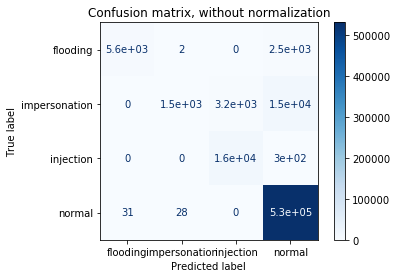

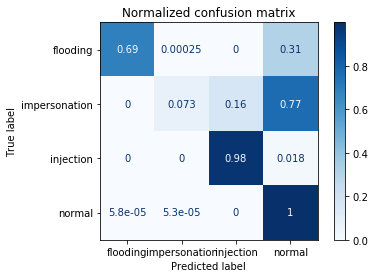

In [63]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names=['flooding', 'impersonation', 'injection', 'normal']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test_scaled, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [64]:
import shap

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


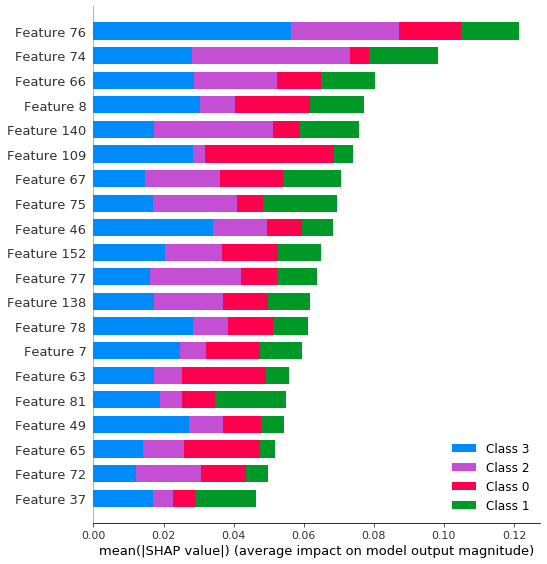

In [66]:
# load JS visualization code to notebook
shap.initjs()
X_importance = X_rs

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X_importance)
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)